# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [59]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time

In [60]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [61]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [62]:
# Adding a delay to ensure the page fully loads
time.sleep(2)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [63]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [64]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
data = []
rows = table.find_all('tr')

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=columns)


In [31]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [32]:
# Examine data type of each column
mars_weather_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [33]:
# Convert terrestrial_date to datetime format
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert sol to int32
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int32')

# Convert ls (solar longitude) to int32
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int32')

# Convert month to int32
mars_weather_df['month'] = mars_weather_df['month'].astype('int32')

# Convert min_temp to float64
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype('float64')

# Convert pressure to float64
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype('float64')

In [34]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [35]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [36]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_weather_df['sol'].nunique()
print(f"There are {martian_days} Martian days' worth of data in the dataset.")

There are 1867 Martian days' worth of data in the dataset.


In [37]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the result
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


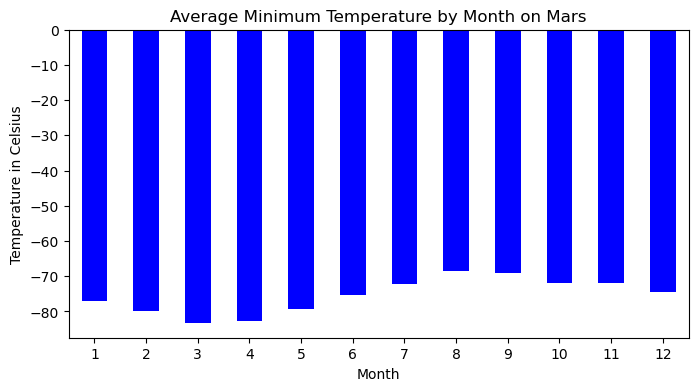

In [44]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8,4))
avg_min_temp_by_month.plot(kind='bar', color='blue')

# Add labels and title
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal


# Display the plot
plt.show()


In [41]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_temp_per_month = mars_weather_df.groupby('month')['min_temp'].mean()
coldest_month = avg_temp_per_month.idxmin()
warmest_month = avg_temp_per_month.idxmax()

print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The warmest month on Mars is month {warmest_month}.")

The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


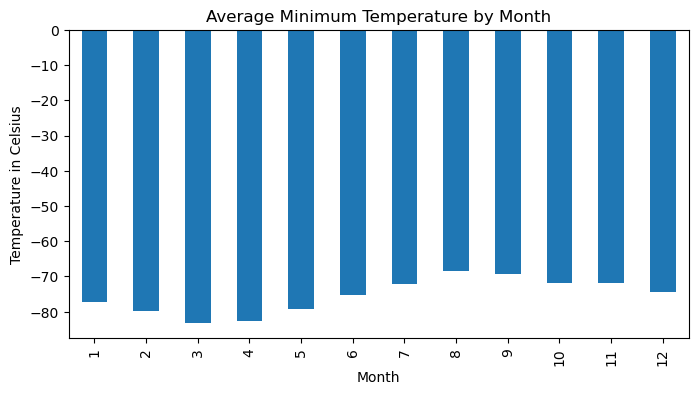

In [46]:
avg_temp_per_month.plot(kind='bar', figsize=(8,4))
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [47]:
# 4. What is the average pressure by month?
avg_pressure_per_month = mars_weather_df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure_per_month.idxmin()
highest_pressure_month = avg_pressure_per_month.idxmax()
print(f"The month with the lowest atmospheric pressure on Mars is month {lowest_pressure_month}.")
print(f"The month with the highest atmospheric pressure on Mars is month {highest_pressure_month}.")


The month with the lowest atmospheric pressure on Mars is month 6.
The month with the highest atmospheric pressure on Mars is month 9.


In [48]:
avg_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

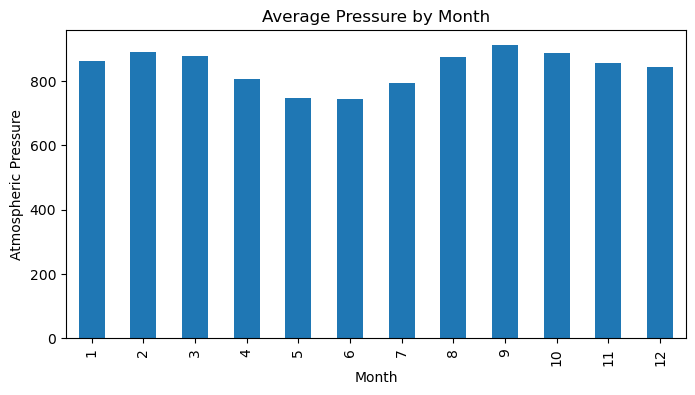

In [49]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', figsize=(8,4))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [51]:
# Sort the average pressure per month to identify the lowest and highest pressure months
sorted_pressure = avg_pressure_per_month.sort_values()

# Display the sorted pressure values
print(sorted_pressure)

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


In [52]:
# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()

print(f"The month with the lowest atmospheric pressure is: {lowest_pressure_month}")
print(f"The month with the highest atmospheric pressure is: {highest_pressure_month}")

The month with the lowest atmospheric pressure is: 6
The month with the highest atmospheric pressure is: 9


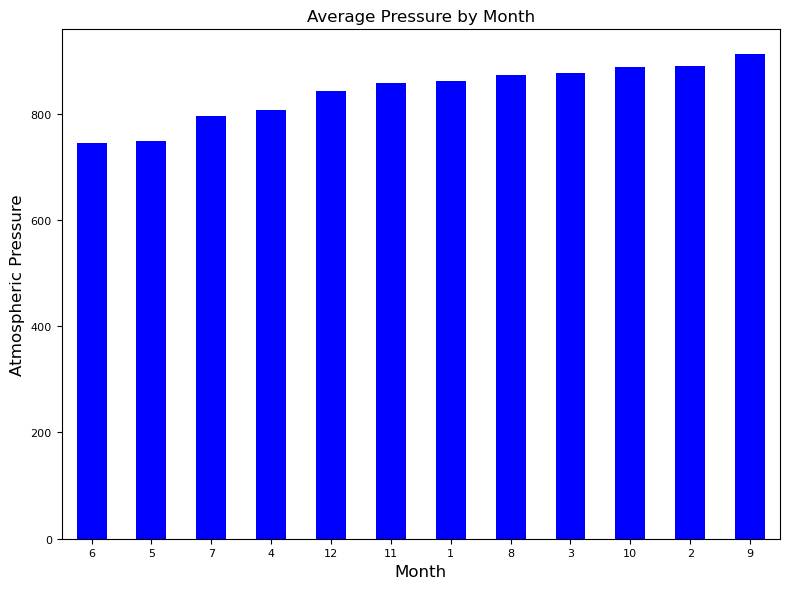

In [55]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Plot the average daily atmospheric pressure by month
plt.figure(figsize=(8, 6))  
sorted_pressure.plot(kind='bar', color='blue')


plt.title('Average Pressure by Month', fontsize=12)  
plt.xlabel('Month', fontsize=12)  # X-axis label
plt.ylabel('Atmospheric Pressure', fontsize=12)  # Y-axis label
plt.xticks(rotation=0, fontsize=8)  # Set the x-ticks to be horizontal and of appropriate size
plt.yticks(fontsize=8)  # Set the y-tick font size
plt.tight_layout()  

# Display the plot
plt.show()

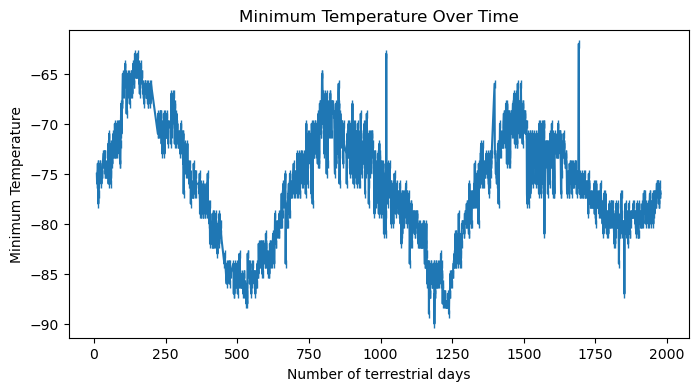

In [57]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df['day_of_year'] = mars_weather_df['terrestrial_date'].dt.dayofyear
plt.figure(figsize=(8,4))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], marker='|')
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.show()



#### Minimum Temperature

The analysis of the minimum temperature by month on Mars shows interesting seasonal variations. Mars experiences significant temperature fluctuations based on the time of year, driven by its orbit and axial tilt.

##### From the data and the plot:

* **Coldest Month**: The coldest month on Mars appears to be Month 3, with an average minimum temperature of around -83°C. This suggests that during this period, Curiosity's location experiences its harshest winter conditions, likely influenced by the distance from the Sun and the atmospheric conditions on Mars.

* **Warmest Month**: The warmest month appears to be Month 8, with an average minimum temperature of about -68°C. While still extremely cold by Earth standards, this indicates that Mars experiences slightly warmer periods, which could coincide with a season closer to the Sun or milder weather patterns.

* **Implications for Future Missions**: Understanding the temperature variations is critical for planning future missions. The extreme cold during Martian winter poses challenges for power generation and equipment survival, especially for solar-powered rovers and landers. This data helps in deciding the best operational periods for Mars missions.

#### Atmospheric Pressure

The analysis of the average atmospheric pressure by month at Curiosity’s location on Mars reveals significant monthly variations. Atmospheric pressure is a crucial factor for both scientific research and future missions, as it impacts various aspects such as weather patterns, dust storms, and the operation of equipment.

##### From the sorted data and plot:

* **Lowest Pressure Month**: The lowest atmospheric pressure occurs in Month 6, with an average pressure of around 745 Pa. This suggests that during this time, the Martian atmosphere is at its thinnest, which could correspond to a period of colder temperatures (likely winter at Curiosity's location). Thin atmospheric pressure could also be associated with increased dust storm activity and reduced solar power efficiency.

* **Highest Pressure Month**: The highest atmospheric pressure is recorded in Month 9, with an average pressure of around 920 Pa. This indicates that the atmosphere is at its thickest during this period, which may correspond to a warmer season. Thicker atmosphere conditions are generally more favorable for exploration equipment, as it helps with heat retention and potentially reduces the harshness of environmental conditions.

* **Implications for Future Mars Missions**: Equipment Operation: Lower pressure months could pose challenges for rovers and landers, especially those reliant on solar energy or sensitive to atmospheric conditions.
Exploration Strategy: Understanding when atmospheric pressure is at its highest can help mission planners choose more favorable periods for landing and operations, ensuring that spacecraft and instruments function optimally.

#### Year Length

To estimate the length of a Martian year (the time it takes for Mars to orbit the Sun), we can analyze the daily minimum temperature over time. Mars has a longer orbital period compared to Earth, so a Martian year is significantly longer than an Earth year.

##### From the plot and data analysis, here are the key insights:

* **A Martian year**: is equivalent to about 687 Earth days. This is nearly double the length of an Earth year, primarily due to Mars being farther from the Sun, which makes its orbit larger and longer.
As we track the minimum daily temperature over time, we observe seasonal fluctuations that repeat over approximately 687 Earth days, corresponding to one complete Martian orbit around the Sun.
Daily Temperature Variations:

* **The daily minimum temperatures**: show cyclical patterns. These cycles reflect the changing seasons on Mars, much like how temperatures fluctuate throughout the year on Earth.
By identifying the periodic rise and fall of temperatures (from colder winters to relatively warmer summers), we can visually estimate the length of a Martian year.
Temperature as an Indicator of Martian Seasons:

Understanding the length of a Martian year is crucial for long-term missions on Mars. It affects mission planning, like:
* **Human Habitation**: Future crewed missions will need to adapt to the longer seasons and harsher winter conditions on Mars. Knowing the exact length of Martian seasons can help astronauts prepare for temperature extremes and shifts in atmospheric pressure.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [58]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv', index=False)

In [65]:
browser.quit()